In [4]:
from pfapack import pfaffian as cpf
import adaptive
from systems import get_mti_hamiltonian
import numpy as np
from operator import itemgetter
from systems import make_lead
from funcs import get_default_params
import pandas as pd

In [ ]:
# get_mti_hamiltonian(ph_symmetry=True, disorder=False)

'-mu * kron(sigma_z, sigma_0, sigma_0) +hbar * vF * k_y * kron(sigma_0, sigma_x, sigma_z) - hbar * vF * k_x * kron(sigma_z, sigma_y, sigma_z) + {m} * kron(sigma_z, sigma_0, sigma_x) + Msysz * kron(sigma_z, sigma_z, sigma_0) +  - re({Delta}) * (kron(sigma_y, sigma_y,sigma_0) + kron(sigma_y, sigma_y,sigma_z))/2 - im({Delta}) * (kron(sigma_x, sigma_y,sigma_0) + kron(sigma_x, sigma_y,sigma_z))/2'

In [ ]:
default_params = dict(
    hbar=1,
    mu=0.045,
    V=0,
    mu_m=1.6,
    vF=3,#for Bi2Se3-based 3DTI, 10^15 canceled out with hbar
    m0=-0.005,
    m1=15,
    Msysz=0.03,
    Msysx=.0,
    Msysy=.0,
    Mz=0.1,
    Mx=.0,
    My=.0,
    a=10,
    phi_0=1.0,
    exp=np.exp,
    Smag_imp=0.0,
    Smag_mimp=.0,
    Stheta_mimp=np.pi/2,
    Sphi_mimp=.0,
    re=lambda x: x.real,
    im=lambda x: x.imag,
    Delta=0.005
)

In [ ]:
params = dict(
hbar=1,
mu=0.045,
V=0,
mu_m=1.6,
vF=3,#for Bi2Se3-based 3DTI, 10^15 canceled out with hbar
m0=-0.005,
m1=15,
Msysz=0.03,
Msysx=.0,
Msysy=.0,
Mz=0.1,
Mx=.0,
My=.0,
a=10,
phi_0=1.0,
exp=np.exp,
Smag_imp=0.0,
Smag_mimp=.0,
Stheta_mimp=np.pi/2,
Sphi_mimp=.0,
re=lambda x: x.real,
im=lambda x: x.imag,
Delta=0.005
)

In [3]:
import funcs
import adaptive
import kwant 
import kwant.continuum
import warnings
from systems import make_lead
def majorana_num(xy, W, Delta):
    warnings.filterwarnings("ignore", category=np.ComplexWarning)
    # params = default_params.copy()
    
    import importlib
    import time    
    parmas=get_default_params
    # importlib.reload(funcs)

    a=10    
    lead = make_lead(W)
    params["Delta"] = Delta
    params["Msysz"], params["mu"] = xy

    
    return dict(mn=funcs.majorana_num2(lead, params))

In [46]:
pfaf_combos = {
    'Delta': [0.005],
    'W': [400]
}

learner_type = adaptive.make_datasaver(adaptive.Learner2D, arg_picker=itemgetter('mn'))
pfaf_learner = adaptive.BalancingLearner.from_product(
    majorana_num, 
    learner_type, 
    dict(bounds=[(0, 0.05), (0.0,0.05)]),
    pfaf_combos
)

In [47]:
pfaf_runner = adaptive.Runner(pfaf_learner)

In [53]:
print(len(pfaf_learner.data))

36


In [54]:
xys_mn, zs_mn = zip(*sorted(pfaf_learner.learners[0].data.items()))

In [55]:
xys_mn=1000*np.array(xys_mn)
zs_mn=np.array(zs_mn)

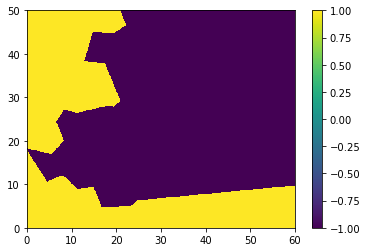

In [56]:
from scipy.interpolate import NearestNDInterpolator
import matplotlib.pyplot as plt
X = np.linspace(0, 50, 501)
Y = np.linspace(0, 50, 501)
X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
interp = NearestNDInterpolator(xys_mn, zs_mn)
Z = interp(X, Y)
# plt.pcolormesh(X, Y, Z, shading='auto')
cs = plt.pcolormesh(X, Y, Z)
# plt.legend()
# plt.xlim(0,0.05)
plt.colorbar()
plt.show()